# Introduction to Deep Learning with Keras - Classification

In the first tutorial notebook we used the NN as a regression tool. A second large area where Deep Neural Networks are applied is classification. 
Depending on the different classes we want to distinguish, we talk about
 * Binary Classification
 * Multi-Class Classification

We are still in the field of Supervised Learning but the true values are now discrete **Class Labels**.

In **Binary Classification** the target values are typically $y^{(i)} \in \{0,1\}$,  like "Cats=0" and "Dogs=1", or Background and Signal. 
The dataset consists in this case of the multi-dimensional input vectors $\mathbf{x}^{(i)}$, our data points, together with the true labels $y^{(i)} \in \{0,1\}$.

In order to make the connection between the discrete class label and the continous NN output, we introduce a probabilistic interpretation of the NN. We assume that the NN represents some probability density $p(\mathbf{x}|\mathbf{w},\mathbf{b})$ and we try to learn this density from the distribution of the labels in our data. 

A single node as last layer with a sigmoid activation function, the **Logistic Function**, is a way to implement this. The logistic function  maps all input into the range $[0,1]$, as it should be for a proper probability.

<img src="img/Activation_logistic.png" width="200" >$f(x)=\sigma(x)=\frac{1}{1+\exp({-x})}$  


For the training of such a network a special loss function is needed. 
The optimal parameters $\mathbf{w,b}$ can be found by an Maximum Likelihood approach.
The decision between 1/0 is a binomial process (Bernoulli trial), like tossing a coil. 
If we assume that the NN represents a probability estimate 
$\widehat{y}=p(\mathbf{x}|\mathbf{w},\mathbf{b})$, than the probability for being in class 1 will be just $\widehat{y}$, and $1-\widehat{y}$ for being in class 0. The -log likelihood becomes for one batch with $\;n_{batch}\;$ data points:

$-\frac{1}{n_{batch}}\sum_{i=1}^{n_{batch}}y_i\log(\widehat{y_i})+(1-y_i)\log(1-\widehat{y_i})$ 

In addition, we have normalized by $1/n_{batch}$ that makes it easy to interpret $\frac{1}{n_{batch}}\sum_{i=1}^{n_{batch}}y_i$ as probability of class 1 in the data.
 
This expression is also known as **Cross Entropy**. The name is related to the fact that entropy is defined as the expecation value of log(probability): _Entropy_$\,:=\int log(p)p(x)dx$. If we take the average over some other probability $q(x)$, we talk about cross entropy, _Cross Entropy_$\,:=\int log(p)q(x)dx$. It can be shown that the cross entropy becomes minimal when the two probabilities are identical $p=q$. https://en.wikipedia.org/wiki/Gibbs%27_inequality

With cross entropy as loss function, the NN learns to model the distribution of the training labels $y^{(i)}$. After the training the NN output $\widehat{y}$ is a number between $[0,1]$. To get a yes/no answer, one typically applies a cut at $0.5$.
***

### Binary Classification Example 

We create the same toy data as in part 1, but this time we only ask if the output is positive

In [184]:
# We create the same toy data as in part 1, but we only ask if the output is positive
import numpy as np
# We create 10000 random vectors each 10-dim
N_samples=10000
N_in=10
# A matrix N_samplesxN_in, uniform in [0,1)
x_train=np.random.rand(N_samples,N_in)
# Sum of squares along N_in
z = np.sum( np.square(x_train),axis=1)
y_train = (np.sin(z) >= 0).astype(np.int32)

In [192]:
# The first 10 target values
print y_train[:10]

[1 1 1 0 1 1 0 0 1 0]


***
We build a simple network to classify our toy data. There are a few things to note.
* The shorthand name in Keras for the logistic function is just `sigmoid`.
* Keras provides a cross entropy loss function for the binary case:<br> 
**losses.BinaryCrossentropy** https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy.
* When we compile the model we also add Accuracy as a **Metric**: `metrics=['acc']`.<br>
A metric is a quality measure, similar to the loss, but it is not used for the learning. 
* We define a validation sample for the fit method: `validation_split=0.2`. This means that 20% of our trainings data will be put aside and only be used for validation. 

**Accuracy** is calculated from the predictions of the trained network. It is defined as the ratio of the correct classified labels (the correct 0s and 1s) over all data. For calculating, Keras must apply a threshold to get a yes/no response, since The NN output $\widehat{y}$ is a number between $[0,1]$. By default the threshold value is $\widehat{y}>0.5$ when calculating the accuracy. 

Also for the fitting, we use a new functionality. When we test the performance of a network on the same dataset that had been used for training, the result will be over-optimistic. The network typically learns some accidental patterns from the datasets. The performance will not **generalize** to new, unseen data. To check for such **Overtraining**, we calculate the loss and the metric(s) on an independent test sample. https://en.wikipedia.org/wiki/Overfitting

In [207]:
from tensorflow.keras import models, layers, losses, optimizers

model = models.Sequential(
    [
        layers.Dense(50, activation='relu', input_dim=10),
        layers.Dense(50, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)
optimizer = optimizers.Adam()
model.compile(optimizer=optimizer,loss=losses.BinaryCrossentropy(), metrics=['acc'])
histObj = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 75us/sample - loss: 0.6630 - acc: 0.5658 - val_loss: 0.6525 - val_acc: 0.5535
Epoch 2/20
8000/8000 [==============================] - 0s 10us/sample - loss: 0.6277 - acc: 0.5900 - val_loss: 0.6122 - val_acc: 0.6160
Epoch 3/20
8000/8000 [==============================] - 0s 11us/sample - loss: 0.5753 - acc: 0.6940 - val_loss: 0.5437 - val_acc: 0.7350
Epoch 4/20
8000/8000 [==============================] - 0s 11us/sample - loss: 0.4918 - acc: 0.7908 - val_loss: 0.4523 - val_acc: 0.8385
Epoch 5/20
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4095 - acc: 0.8475 - val_loss: 0.3881 - val_acc: 0.8420
Epoch 6/20
8000/8000 [==============================] - 0s 11us/sample - loss: 0.3458 - acc: 0.8679 - val_loss: 0.3337 - val_acc: 0.8780
Epoch 7/20
8000/8000 [==============================] - 0s 11us/sample - loss: 0.3033 - acc: 0.8846 - val_loss: 0.2995 - val_acc: 

In [208]:
# We have now 2x2 histories, 
# for the 2 samples, training and validation,
# and for the loss and the accuracy
histObj.history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

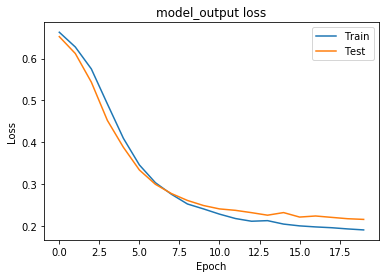

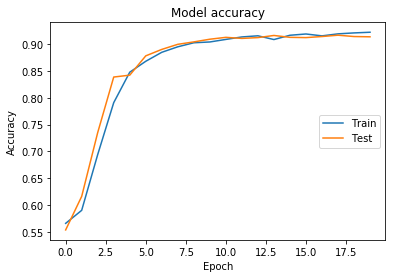

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation loss values
plt.plot(histObj.history['loss'])
plt.plot(histObj.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(histObj.history['acc'])
plt.plot(histObj.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='right')
plt.show()

***
We can evaluate our model on a dataset. `model.evaluate` returns the metric(s) and loss(es) we have provided in the compile step. Note that a larger batch size also speeds up the calculation during prediction!

In [219]:
# We evaluate our model on the complete trainings dataset 
# A larger batch size speeds up the calculations
loss_value, accuracy = model.evaluate(x_train, y_train,batch_size=512)
print(loss_value,accuracy)

10000/10000 [==============================] - 0s 4us/sample - loss: 0.1935 - acc: 0.9204
(0.1934622554063797, 0.9204)


In [249]:
## Uncomment, if you want to test the speed improvements
#%timeit y_pred=model.predict(x_train).reshape(y_train.shape) 
# 1 loop, best of 3: 189 ms per loop
#%timeit y_pred=model.predict(x_train,batch_size=512).reshape(y_train.shape)
# 10 loops, best of 3: 17 ms per loop
## The results maybe differ but only within the numerical presicion
#y_pred_a=model.predict(x_train).reshape(y_train.shape)
#y_pred_b=model.predict(x_train,batch_size=512).reshape(y_train.shape)
#print('numeric identical',np.sum(np.isclose(y_pred_a,y_pred_b)))
y_pred=model.predict(x_train,batch_size=512).reshape(y_train.shape)

In [255]:
# The accuracy calculation by hand
accuracy=np.mean(np.equal(y_train, y_pred>0.5))
print accuracy

0.9204


## Multi-Clasification

$f_{k}(\overrightarrow{x})=\frac{\exp({x_{k}})}{\sum_{j=1}^{J} \exp({x_{j}})} \quad \text { for } k=1, \ldots, N_{classes}$